In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
#imports the own created package
import clustering as cl
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


## Team Results of actual Season Top Leagues: Germany, Italy, France, England and Spain

In [2]:
def country_df(csv):
    df = pd.read_csv(csv)
    df.sort_values('team_name', inplace=True)
    df.reset_index(inplace=True)
    df.drop("index", axis=1, inplace=True)
    return df

In [3]:
df_france = country_df("ms/auto_download/auto_download_files/france-ligue-1-teams-2020-to-2021-stats.csv")
df_germany = country_df("ms/auto_download/auto_download_files/germany-bundesliga-teams-2020-to-2021-stats.csv")
df_england = country_df("ms/auto_download/auto_download_files/england-premier-league-teams-2020-to-2021-stats.csv")
df_italy = country_df("ms/auto_download/auto_download_files/italy-serie-a-teams-2020-to-2021-stats.csv")
df_spain = country_df("ms/auto_download/auto_download_files/spain-la-liga-teams-2020-to-2021-stats.csv")

## Match Data from League Climbers

2019 - 2020

In [4]:
df_teams_last_second = pd.read_csv('germany_stats/team_stats/germany-2-bundesliga-teams-2019-to-2020-stats.csv')

In [5]:
df_bielefeld = df_teams_last_second[df_teams_last_second['common_name']=='Arminia Bielefeld']

In [6]:
df_teams_last_first = pd.read_csv('germany_stats/team_stats/germany-bundesliga-teams-2019-to-2020-stats.csv')

In [7]:
df_dusseldorf = df_teams_last_first[df_teams_last_first['common_name']=='Fortuna Düsseldorf']
df_paderborn = df_teams_last_first[df_teams_last_first['common_name']=='Paderborn']

2018 - 2019

In [8]:
df_teams_last_first = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2018-to-2019-stats.csv")

In [9]:
df_nueremberg = df_teams_last_first[df_teams_last_first['common_name'] == 'Nürnberg']
df_hannover = df_teams_last_first[df_teams_last_first['common_name'] == 'Hannover 96']
df_stuttgart = df_teams_last_first[df_teams_last_first['common_name'] == 'Stuttgart']

2017 - 2018

In [10]:
df_teams_last_17_18 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2017-to-2018-stats.csv")

In [11]:
df_hsv = df_teams_last_17_18[df_teams_last_17_18['common_name'] == 'Hamburger SV']

2016 - 2017

In [12]:
df_teams_last_16_17 = pd.read_csv("germany_stats/team_stats/germany-bundesliga-teams-2016-to-2017-stats.csv")

In [13]:
df_darmstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Darmstadt 98']
df_ingolstadt = df_teams_last_16_17[df_teams_last_16_17['common_name'] == 'Ingolstadt']

## Concat all Df's

In [14]:
df_all = pd.concat([df_germany, df_england, df_italy, df_spain, df_france],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_european_leagues = df_all.copy()

In [15]:
df_league_climbers = pd.concat([df_nueremberg, df_bielefeld, df_hannover, df_stuttgart, df_hsv, df_darmstadt, df_ingolstadt, df_dusseldorf, df_paderborn],sort=False)
df_league_climbers.reset_index(inplace=True)
df_league_climbers.drop("index", axis=1, inplace=True)
df_all_climbers = df_league_climbers.copy()
# columns = ['wins', 'wins_home', 'wins_away', 'draws', 'draws_home', 'draws_away', 'losses', 'losses_home', 'losses_away']

In [16]:
df_all_climbers

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_scored_min_81_to_90,goals_conceded_min_0_to_10,goals_conceded_min_11_to_20,goals_conceded_min_21_to_30,goals_conceded_min_31_to_40,goals_conceded_min_41_to_50,goals_conceded_min_51_to_60,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90
0,1. FC Nürnberg,Nürnberg,2018/2019,Germany,34,17,17,0,3,3,...,6,5,4,8,7,5,10,10,8,11
1,DSC Arminia Bielefeld,Arminia Bielefeld,2019/2020,Germany,34,17,17,0,18,9,...,14,3,1,4,2,2,5,2,5,6
2,Hannoverscher Sportverein 1896,Hannover 96,2018/2019,Germany,34,17,17,0,5,5,...,4,7,4,4,7,7,9,8,10,15
3,VfB Stuttgart 1893,Stuttgart,2018/2019,Germany,34,17,17,0,7,6,...,6,6,3,7,5,10,7,11,9,12
4,Hamburger SV,Hamburger SV,2017/2018,Germany,34,17,17,0,8,6,...,6,5,7,6,3,6,6,5,7,8
5,SV Darmstadt 1898,Darmstadt 98,2016/2017,Germany,34,17,17,0,7,6,...,6,2,6,3,3,8,10,9,9,13
6,FC Ingolstadt 04,Ingolstadt,2016/2017,Germany,34,17,17,0,8,4,...,2,3,5,3,6,7,4,5,9,15
7,Düsseldorfer TuS Fortuna 1895,Fortuna Düsseldorf,2019/2020,Germany,34,17,17,0,6,4,...,8,4,3,5,7,9,8,13,8,10
8,SC Paderborn 07,Paderborn,2019/2020,Germany,34,17,17,0,4,2,...,5,12,6,9,10,4,10,5,7,11


In [17]:
df_all = pd.concat([df_european_leagues, df_all_climbers],sort=False)
df_all.reset_index(inplace=True)
df_all.drop("index", axis=1, inplace=True)
df_total = df_all.copy()

In [18]:
# COMMENT OUT IF YOU WANT AA WITHOUT CLIMBERS
# df_total = df_european_leagues.copy()

In [19]:
df_total.shape

(107, 280)

In [20]:
len(df_total.columns)

280

In [21]:
from pandas.plotting import scatter_matrix

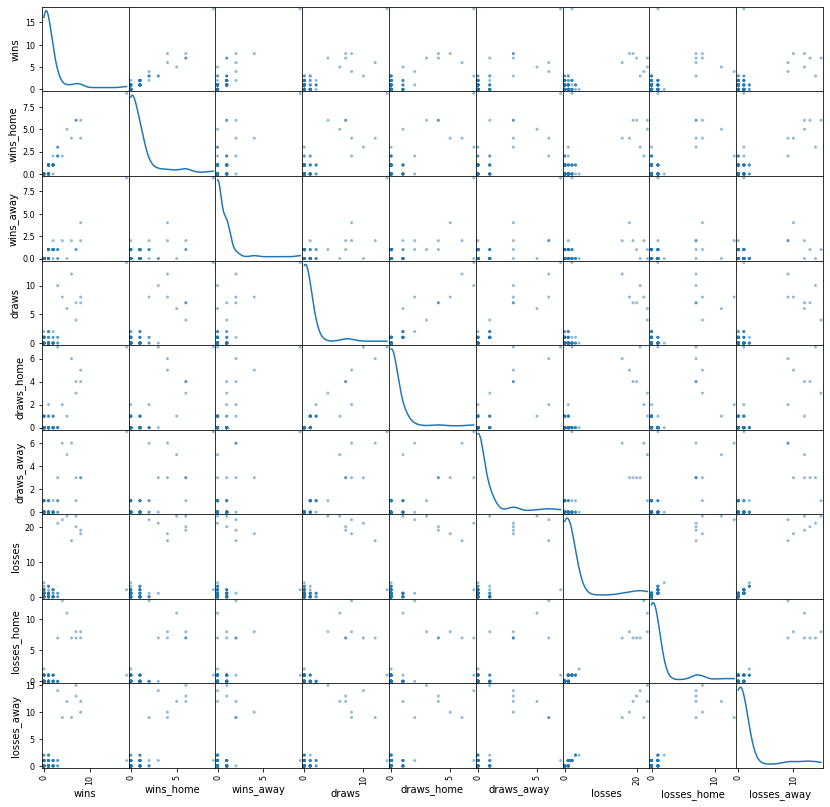

In [22]:
scatter_matrix(df_total[df_total.iloc[:,8:17].columns], diagonal='kde', figsize=(14,14));

## Build the matrix

In [23]:
df_all.set_index("team_name", inplace=True)
df_all = df_all.T

In [24]:
df_all

team_name,1. FC Köln,1. FC Union Berlin,1. FSV Mainz 05,BVB 09 Borussia Dortmund,Bayer 04 Leverkusen,Borussia VfL Mönchengladbach,DSC Arminia Bielefeld,Eintracht Frankfurt,FC Augsburg,FC Bayern München,...,Stade de Reims,1. FC Nürnberg,DSC Arminia Bielefeld,Hannoverscher Sportverein 1896,VfB Stuttgart 1893,Hamburger SV,SV Darmstadt 1898,FC Ingolstadt 04,Düsseldorfer TuS Fortuna 1895,SC Paderborn 07
common_name,Köln,Union Berlin,Mainz 05,Borussia Dortmund,Bayer Leverkusen,Borussia M'gladbach,Arminia Bielefeld,Eintracht Frankfurt,Augsburg,Bayern München,...,Reims,Nürnberg,Arminia Bielefeld,Hannover 96,Stuttgart,Hamburger SV,Darmstadt 98,Ingolstadt,Fortuna Düsseldorf,Paderborn
season,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,2020/2021,...,2020/2021,2018/2019,2019/2020,2018/2019,2018/2019,2017/2018,2016/2017,2016/2017,2019/2020,2019/2020
country,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,...,France,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany
matches_played,1,1,1,1,1,1,1,1,1,1,...,4,34,34,34,34,34,34,34,34,34
matches_played_home,1,1,0,1,0,0,0,1,0,1,...,1,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goals_conceded_min_41_to_50,1,0,0,0,0,0,0,0,0,0,...,1,5,2,7,10,6,8,7,9,4
goals_conceded_min_51_to_60,0,0,1,0,0,1,0,1,0,0,...,2,10,5,9,7,6,10,4,8,10
goals_conceded_min_61_to_70,0,0,0,0,0,0,1,0,0,0,...,0,10,2,8,11,5,9,5,13,5
goals_conceded_min_71_to_80,0,0,0,0,0,1,0,0,1,0,...,0,8,5,10,9,7,9,9,8,7


In [25]:
df_teams_numerical = df_all.iloc[8:,:]

In [26]:
df_norm = (df_teams_numerical - df_teams_numerical.min()) / (df_teams_numerical.max() - df_teams_numerical.min())

In [27]:
X = df_norm.to_numpy()

## AA Analysis

In [28]:
archetypal=cl.clustering.ArchetypalAnalysis(n_archetypes=5,iterations=10,tmax=300)
archetypal.fit(X)

Z=(archetypal.archetypes())

RSS = 28.757255265026007
RSS = 24.13842003647176
RSS = 23.250772525647147
RSS = 22.99804915126839
RSS = 22.89776052491314
RSS = 22.84268829962268
RSS = 22.812304045962115
RSS = 22.79526005475861
RSS = 22.78387125303177
RSS = 22.77698100045139


In [29]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)})
sns.set_context('talk', rc={ 'lines.linewidth': 6}, font_scale=1.5)

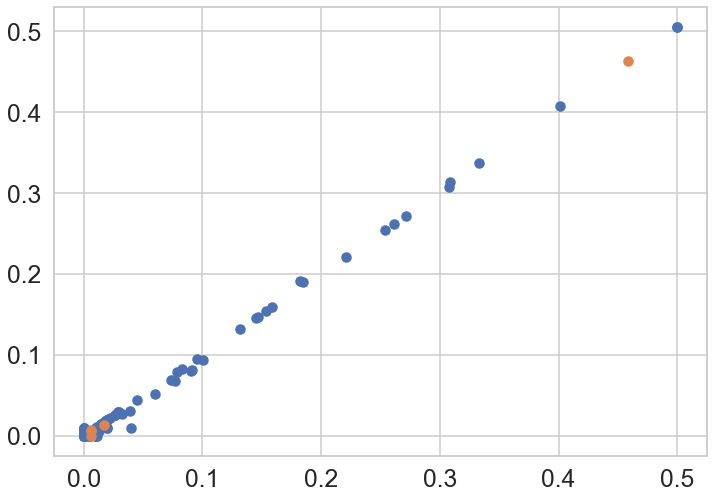

In [30]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(np.array(Z[0,:]),np.array(Z[1,:]))
plt.show()

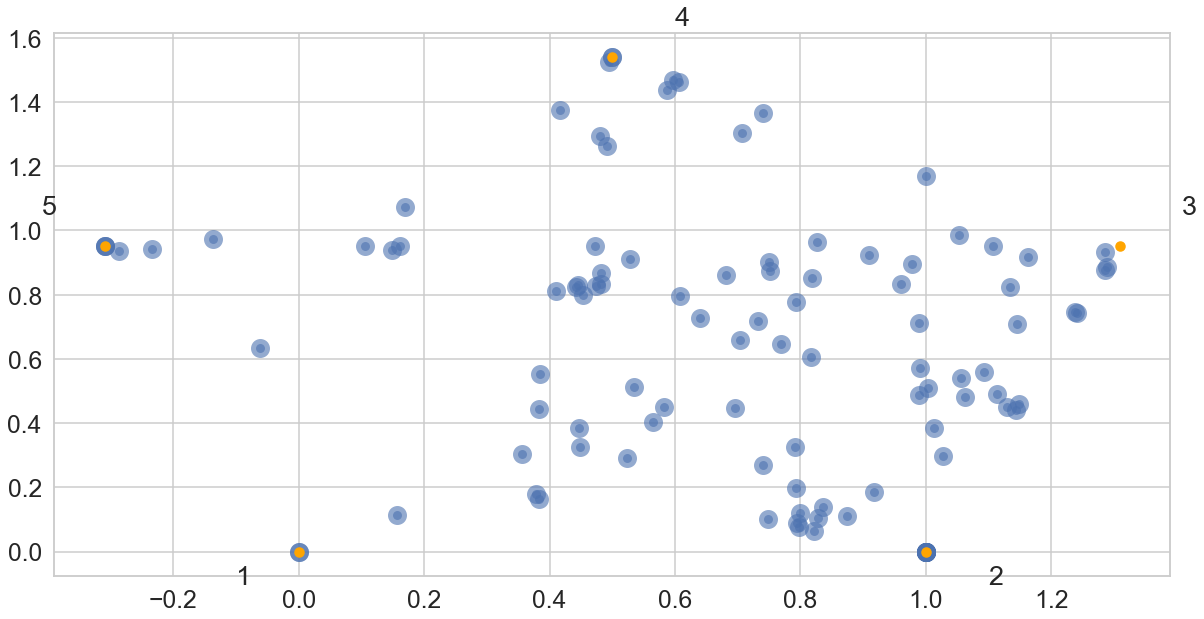

In [31]:
A=archetypal.transform(X)
dp=archetypal.map2D
dat=dp @ A

f, ax = plt.subplots(figsize=(20, 10))
ax=cl.clustering.archetypal_plot(ax,dat,dp,epsilon=.1)
ax.set_aspect('auto')
plt.show()

## Create data labels

In [32]:
teamsList = df_total['team_name']
temasColumnOrdering={x:y for y,x in enumerate(teamsList)}
labels={v: k for k, v in temasColumnOrdering.items()}

In [33]:
df_labels = pd.DataFrame.from_dict(labels, orient='index').reset_index(drop=True)

In [34]:
labels = df_labels.to_dict()

In [41]:
for i in range(0,len(labels[0])):
    print("{:40}".format(labels[0][i]),end='')
    for j in A[:,i]:
        print("{:.3f} ".format(j),end='')
    print("")

1. FC Köln                              0.000 0.218 0.777 0.005 0.000 
1. FC Union Berlin                      0.000 0.520 0.286 0.195 0.000 
1. FSV Mainz 05                         0.000 0.465 0.435 0.000 0.100 
BVB 09 Borussia Dortmund                0.000 0.074 0.210 0.717 0.000 
Bayer 04 Leverkusen                     0.000 0.000 0.000 0.000 1.000 
Borussia VfL Mönchengladbach            0.000 0.134 0.356 0.000 0.510 
DSC Arminia Bielefeld                   0.013 0.000 0.280 0.000 0.707 
Eintracht Frankfurt                     0.020 0.000 0.120 0.860 0.000 
FC Augsburg                             0.000 0.486 0.409 0.000 0.105 
FC Bayern München                       0.000 0.664 0.224 0.112 0.000 
FC Schalke 04                           0.000 0.687 0.270 0.000 0.043 
Hertha BSC                              0.000 0.484 0.487 0.000 0.029 
Rasen Ballsport Leipzig                 0.000 0.401 0.356 0.242 0.000 
SC Freiburg                             0.000 0.525 0.464 0.000 0.011 
SV Wer

## Merge Result with original dataframe

In [42]:
df_aa_result = pd.DataFrame(data=A.T)
df_aa_result.columns = df_aa_result.columns.map(str)

In [43]:
df_teams_with_aa = pd.concat([df_total, df_aa_result], axis=1)
df_teams_only_aa = df_teams_with_aa.iloc[:,280:]
df_teams_only_aa['common_name'] = df_teams_with_aa['common_name']

In [44]:
df_teams_only_aa

,0,1,2,3,4,common_name
0,0.000044,0.218007,0.777143,0.004806,0.000000,Köln
1,0.000044,0.519646,0.285604,0.194707,0.000000,Union Berlin
2,0.000044,0.464629,0.435327,0.000000,0.100000,Mainz 05
3,0.000044,0.073754,0.209524,0.716678,0.000000,Borussia Dortmund
4,0.000000,0.000000,0.000000,0.000000,1.000000,Bayer Leverkusen
...,...,...,...,...,...,...
102,0.140842,0.747841,0.048040,0.054994,0.008283,Hamburger SV
103,0.163167,0.739114,0.031827,0.048505,0.017386,Darmstadt 98
104,0.109723,0.790941,0.055570,0.029767,0.013998,Ingolstadt
105,0.175925,0.732004,0.061683,0.030388,0.000000,Fortuna Düsseldorf


## Save Result as Pickle file

In [45]:
df_teams_only_aa.to_pickle("pickle_files/df_teams_only_aa.pkl")